In [ ]:
import pandas as pd
path="https://raw.githubusercontent.com/oussama-hadda/Heart-disease-indicators/main/heart_disease_indicators.csv"
df = pd.read_csv(path)

In [ ]:
df.shape

(319795, 18)

In [ ]:
df.head() 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
# The goal is to predict weither the example has a heart disease or not 

X=df.loc[:,df.columns!='HeartDisease'] # Features
y=df['HeartDisease'] # Class

In [ ]:
X.head() 

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
X.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: HeartDisease, dtype: object

In [ ]:
y.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
num_var=['BMI','PhysicalHealth','MentalHealth',	'SleepTime']
for var in num_var:
  X[var]=std.fit_transform(X[[var]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
# Handling ordinal categorical variables: AgeCategory, GenHealth .
# First, let's get all the categories in each varaible
AgeCategory_categories=X.AgeCategory.unique()
GenHealth_categories=X.GenHealth.unique() 
print("AgeCategory categories: ", AgeCategory_categories)
print("GenHealth categories: ", GenHealth_categories)

AgeCategory categories:  ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
GenHealth categories:  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [ ]:
AgeCategory_mapping={'18-24':1,'25-29':2,'30-34':3,'35-39':4,'40-44':5,'45-49':6,'50-54':7,'55-59':8,'60-64':9,'65-69':10,'70-74':11,'75-79':12,'80 or older':13}
GenHealth_mapping={'Poor' :1,'Fair' :2,'Good':3,'Very good':4,'Excellent':5}
X.loc[:,'AgeCategory']=X.loc[:,'AgeCategory'].map(AgeCategory_mapping)
X.loc[:,'GenHealth']=X.loc[:,'GenHealth'].map(GenHealth_mapping)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Handling nominal categorical variables
# i start by binary variables (variables that contain two exclusive categories: yes or no)
cat_var=['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
X=pd.get_dummies(X,prefix=cat_var,columns=cat_var, drop_first=True)

In [ ]:
# Race and Diabetics are nominal categorical variables that contain more than two categories
X=pd.get_dummies(X) # handle Race and Diabetics

In [ ]:
X.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,-1.844750,-0.046751,3.281069,8,4,-1.460354,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,-1.256338,-0.424070,-0.490039,13,4,-0.067601,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,-0.274603,2.091388,3.281069,10,2,0.628776,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,-0.647473,-0.424070,-0.490039,12,3,-0.763977,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,-0.726138,3.097572,-0.490039,5,4,0.628776,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
y=pd.get_dummies(y, drop_first=True)

In [ ]:
y.head()

,Yes
0,0
1,0
2,0
3,0
4,0


**1.Logistic regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
LR=LogisticRegression(penalty='l2', solver='sag') # sag is a good opitmizer for large datasets
LR.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='sag')

Accuracy: 0.91712216538043
F1 score: 0.191162109375


Text(0.5, 1.0, 'Confusion matrix')

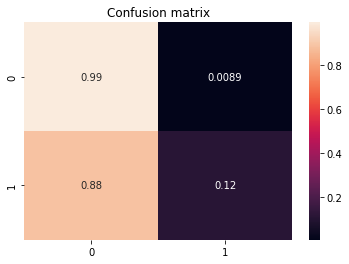

In [ ]:
y_pred=LR.predict(X_test)
# to handle the recall precision trade-off, i choose to evaluate the model using the F1-score.
# the confusion matrix gives us a better understanding on how the algorithm works
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred)) 
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred,normalize='true'),annot=True)
plt.title("Confusion matrix")

The classifier isn't doing very well, the F1 score is too low.
By looking at the confusion matrix, we see that the proportion of the true positives is too low. The model doesn't do well on the negative classes. 
<br>
This is due to the small number of examples on this class; few people in the dataset have had a heart disease (remember class 1 represents a heart disease). If you take a look above, you'll find that the number of 'No' is much grater than the number of 'Yes'. 
<br>
This problem is usually referred to as unbalanced datasets.


In [ ]:
# By giving 'balanced' to the variable class_label, the model uses the values of y 
# to automatically adjust weights inversely proportional to class frequencies
LR=LogisticRegression(penalty='l2', solver='sag', class_weight='balanced') 
LR.fit(X_train,y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', solver='sag')

Accuracy: 0.7506910655542909
F1 score: 0.3467059980334316


Text(0.5, 1.0, 'Confusion matrix')

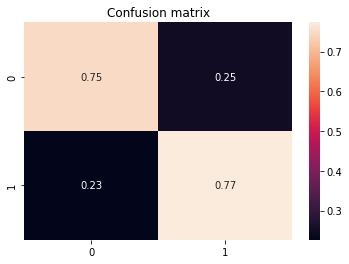

In [ ]:
y_pred=LR.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred)) 
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred,normalize='true'),annot=True)
plt.title("Confusion matrix")

Setting the classe_weight variable to 'balanced' made a huge difference. 

---
Another way to handle unbalanced datasets is to do resampling.
<br>
In this following, i will try three methods of resampling:
- Oversampling
- Undersampling
- Synthetic sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=0) # oversampling
# we do the resampling after splitting the data, otherwise the data may not replicate the real-world data
ros.fit(X_train, y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train) 

In [ ]:
LR_ros=LogisticRegression(penalty='l2', solver='sag') 
LR_ros.fit(X_train_ros,y_train_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='sag')

Accuracy: 0.7500781748364582
F1 score: 0.3464922322158626


Text(0.5, 1.0, 'Confusion matrix')

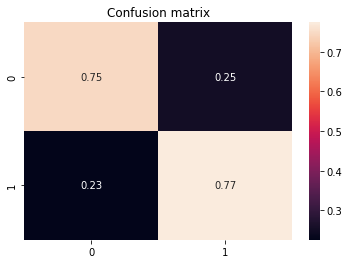

In [ ]:
y_pred_ros=LR_ros.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred_ros))
print("F1 score:",f1_score(y_test,y_pred_ros)) 
plt.figure() 
sns.heatmap(confusion_matrix(y_test,y_pred_ros,normalize='true'),annot=True)
plt.title("Confusion matrix")

In [ ]:
# Let's try with undersampling
rus = RandomUnderSampler(sampling_strategy='majority', random_state=0)
rus.fit(X_train, y_train)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train) 


In [ ]:
LR_rus=LogisticRegression(penalty='l2', solver='sag') 
LR_rus.fit(X_train_rus,y_train_rus) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='sag')

Accuracy: 0.7506910655542909
F1 score: 0.34662033698288863


Text(0.5, 1.0, 'Confusion matrix')

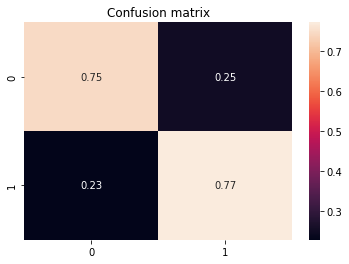

In [ ]:
y_pred_rus=LR_rus.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred_rus))
print("F1 score:",f1_score(y_test,y_pred_rus)) 
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_rus,normalize='true'),annot=True)
plt.title("Confusion matrix")

In [ ]:
# Synthetic sampling
from imblearn.over_sampling import SMOTE
ss = SMOTE(sampling_strategy= 'minority',random_state = 0)
X_train_ss, y_train_ss = ss.fit_resample(X_train, y_train) 

In [ ]:
LR_ss=LogisticRegression(penalty='l2', solver='sag') 
LR_ss.fit(X_train_ss,y_train_ss)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='sag')

Accuracy: 0.7595717269759472
F1 score: 0.33478682170542634


Text(0.5, 1.0, 'Confusion matrix')

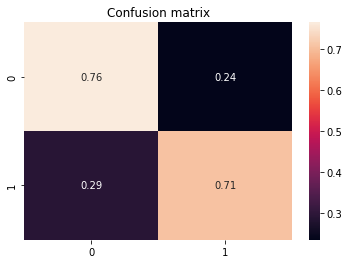

In [ ]:
y_pred_ss=LR_ss.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred_ss))
print("F1 score:",f1_score(y_test,y_pred_ss)) 
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_ss,normalize='true'),annot=True)
plt.title("Confusion matrix")

Sampling methods give an F1 score that is close to the the one obtained by setting the variable class_weight as 'balanced'. In the following, i will use this model.

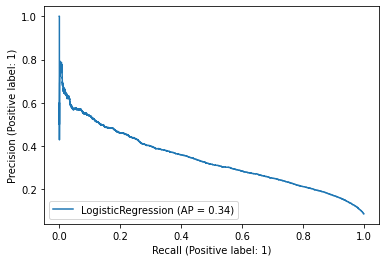

In [ ]:
# Choosing the threshold
PrecisionRecallDisplay.from_estimator(LR, X_test, y_test) 

In [ ]:


thresholds=[0.001, 0.003, 0.009 ,0.1, 0.3,0.5, 0.9 ] 
F1=[]

for t in thresholds:
  LR_t=LogisticRegression(penalty='l2', solver='sag', class_weight='balanced', tol=t ) 
  f1=cross_val_score(LR_t, X_train, y_train, scoring='f1') #f1 score on validation set
  F1.append(f1.mean())

imax=np.argmax(F1)
t=thresholds[imax]
LR_t=LogisticRegression(penalty='l2', solver='sag', class_weight='balanced', tol=t )
LR_t.fit(X_train,y_train)
y_pred_t=LR_t.predict(X_test)
f1=f1_score(y_test,y_pred_t) # f1 score on test set 
accuracy=accuracy_score(y_test,y_pred_t) # accuracy on test set 

print('Best threshold:', t)
print("Accuracy:",accuracy)
print("F1 score on validation set:",F1[imax])
print("F1 score on test set:", f1)  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

Best threshold: 0.5
Accuracy: 0.7970956484759034
F1 score on validation set: 0.3832203122535878
F1 score on test set: 0.3546821545071207


In [ ]:
# Last thing to improve the model: choose regularization parameter
# i do that by cross validation 
reg_param=[50, 100,150, 200,250,300] 
F1=[]

for C in reg_param:
  LR_C=LogisticRegression(penalty='l2', solver='sag', class_weight='balanced', tol=t, C=C ) 
  f1=cross_val_score(LR_C, X_train, y_train, scoring='f1') #f1 score on validation set
  F1.append(mean(f1)) 

imax=np.argmax(F1)
C=reg_param[imax]
LR_C=LogisticRegression(penalty='l2', solver='sag', class_weight='balanced', tol=t, C=C )
LR_C.fit(X_train,y_train)
y_pred_C=LR_C.predict(X_test)
f1=f1_score(y_test,y_pred_C) # f1 score on test set 
accuracy=accuracy_score(y_test,y_pred_C) # accuracy on test set 

print('Best C:', C)
print("F1 score :", f1)  
print("Accuracy:",accuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best C: 300
F1 score : 0.35989206078682007
Accuracy: 0.7745062477329298


In [ ]:
# Another way to improve the model, is by doing feature selection
from sklearn.feature_selection import RFE # recursive feature selection
rfe=RFE(estimator=LR_t) 
rfe.fit(X_train,y_train)
y_pred_rfe=rfe.predict(X_test)
f1=f1_score(y_test,y_pred_rfe) # f1 score on test set 
accuracy=accuracy_score(y_test,y_pred_rfe)
print('F1 score:',f1)
print("Accuracy:",accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

F1 score: 0.3194792562941903
Accuracy: 0.7724674479980987


**2) Deep Learning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1,  test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

for tr_i, ts_i in sss.split(X,y):
  X_train, X_test, y_train, y_test =  X.loc[tr_i], X.loc[ts_i], y.loc[tr_i], y.loc[ts_i]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(255836, 25)
(63959, 25)
(255836, 1)
(63959, 1)


In [ ]:
# Defining the metrics of the model

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), 
]

def build_NN(metrics=METRICS, output_bias=None, rate=1e-3):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  NN = keras.Sequential([
      keras.layers.Dense( 60, activation='relu',input_shape=(X_train.shape[-1],)),
      keras.layers.Dense( 60, activation='relu',input_shape=(X_train.shape[-1],)),
      keras.layers.Dense( 60, activation='relu',input_shape=(X_train.shape[-1],)),
      keras.layers.Dropout(0.5), # the dropout layer is a form of regularization when training neural networkd
      keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias), 
  ])

  NN.compile(
      optimizer=keras.optimizers.Adam(learning_rate=rate), 
      loss=keras.losses.BinaryCrossentropy(), # the loss function of the model is the binary cross entropy
      metrics=metrics)

  return NN

In [ ]:
epochs=150
BATCH_SIZE = 2048 #large number of batch size so that every batch has a decent chance of containing examples of minority class 

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True) # early stopping prevent overfitting


In [ ]:
NN = build_NN()
NN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 60)                1560      
                                                                 
 dense_45 (Dense)            (None, 60)                3660      
                                                                 
 dense_46 (Dense)            (None, 60)                3660      
                                                                 
 dropout_11 (Dropout)        (None, 60)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 61        
                                                                 
Total params: 8,941
Trainable params: 8,941
Non-trainable params: 0
_________________________________________________________________


**Choosing the initial bias**

In [ ]:
results = NN.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0) # computes the loss and the metrics 
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.8697


In [ ]:
neg, pos= y.value_counts() # number of positive and negative classes
initial_bias = np.log([pos/neg])
initial_bias

array([-2.36864084])

In [ ]:
NN = build_NN(output_bias=initial_bias)
results = NN.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0) 
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.2978


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights') # i'm trying various neural networks, so i'm keeping the initial weights in a check point file
NN.save_weights(initial_weights)

In [ ]:
NN = build_NN()
NN.load_weights(initial_weights)
NN.layers[-1].bias.assign([0.0])
zero_bias_history = NN.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_test, y_test), 
    verbose=0)

In [ ]:
NN = build_NN(output_bias=initial_bias)
NN.load_weights(initial_weights)
careful_bias_history = NN.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_test, y_test), 
    verbose=0)

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
def plot_loss(history, label, n):
  # log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')


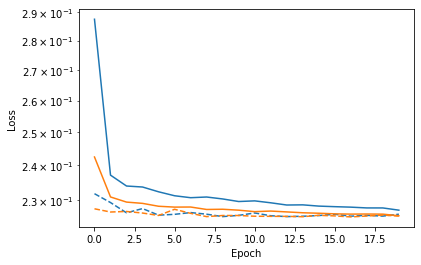

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1) 

Adding an initial weight didn't make a difference in terms of validation error. <br>
**Choosing the learning rate** <br>
In the following, i plot the train and validation errors and for different learning rates to find the one that most fits the validation data.

In [ ]:
rates= [0.1, 0.05, 1e-2, 5e-3, 1e-3, 5e-4]
val_errors=[]
train_errors=[] 
for rate in rates:
  print(rate) 
  NN=build_NN(output_bias=initial_bias, rate=rate) 
  NN.load_weights(initial_weights)
  history=NN.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test),batch_size=BATCH_SIZE, verbose=0) 
  val_errors.append(history.history['val_loss'])
  train_errors.append(history.history['loss'])

0.1
0.05
0.01
0.005
0.001
0.0005


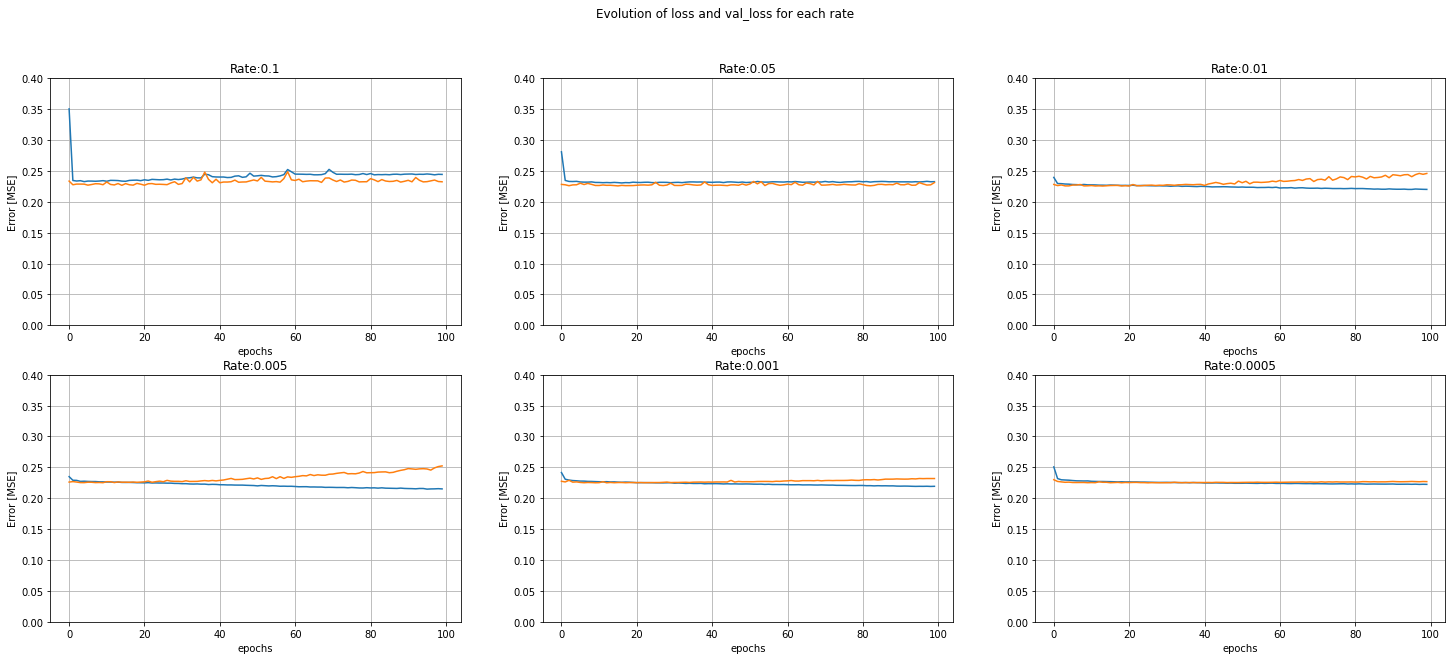

In [ ]:
fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(25)
fig.suptitle('Evolution of loss and val_loss for each rate')
for i in range(2) :
  for j in range(3):
    axs[i,j].plot(train_errors[3*i+j], label='loss')
    axs[i,j].plot(val_errors[3*i+j], label='val_loss')
    axs[i,j].set_title('Rate:'+str(rates[3*i+j]))
    axs[i,j].set_xlabel('epochs')
    axs[i,j].set_ylabel('Error [MSE]')
    axs[i,j].set_ylim([0, 0.4])
    axs[i,j].grid(True)

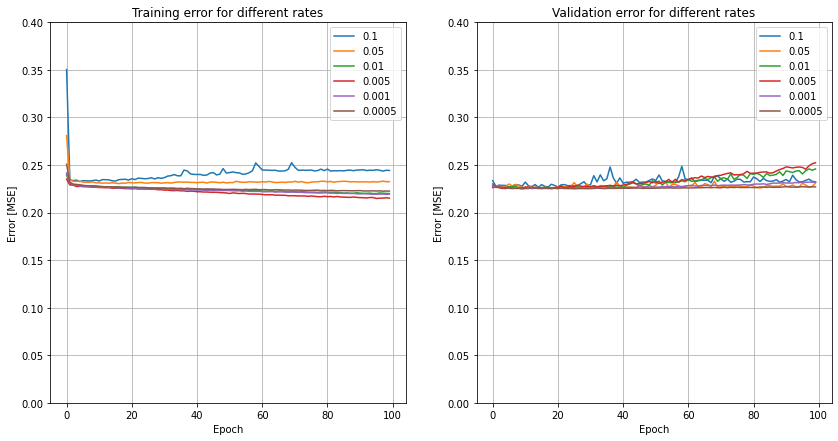

In [ ]:
epochs=[i for i in range(1,131)]
fig, axs = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(14)

axs[0].set_ylim([0, 0.4])
axs[0].grid(True)
axs[0].set_title("Training error for different rates")
for i in range(6):
  axs[0].plot(train_errors[i], label=str(rates[i]))
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Error [MSE]')
  axs[0].legend()

axs[1].set_ylim([0, 0.4])
axs[1].grid(True)
axs[1].set_title("Validation error for different rates")
for i in range(6):
  axs[1].plot(val_errors[i], label=str(rates[i]))
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Error [MSE]')
  axs[1].legend()

The model seems to give random values on the validation set for rates 0.1 , 0.05 and 0.01. For rates 0.001 and 0.0005, the model doesn't overfit and the validation error seems to be the same. The computational cost is less with 0.001. This is the value i'm choosing. <br>
PS: In the curves above, the training error is greater than the validation error. In fact the dropout layer is desactivated when the model is being evaluated.

In [ ]:
# Train the model
NN= build_NN(rate=0.001)
NN.load_weights(initial_weights)
history = NN.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(X_train, y_train), verbose=0)


In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  plt.figure(figsize=(8,6))
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([-0.2,1.2])

    plt.legend();
